In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
dataset = pd.read_csv('knn.csv')
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


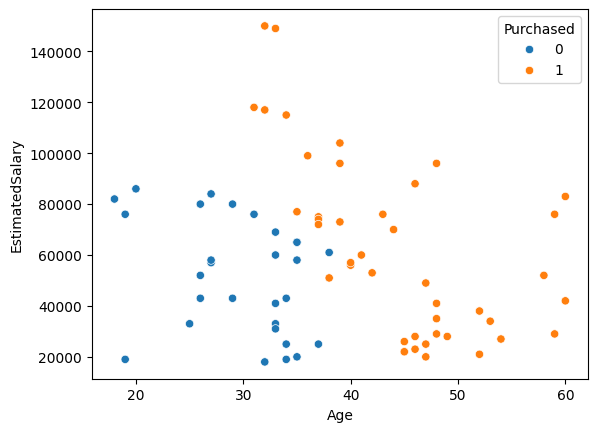

In [33]:
sns.scatterplot(x='Age' , y = 'EstimatedSalary' , data=dataset , hue='Purchased')
plt.show()

In [34]:
# scaling

In [35]:
x = dataset.iloc[: , :-1]
y = dataset['Purchased']

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [37]:
sc.fit(x)
x = pd.DataFrame(sc.transform(x) , columns= x.columns)
x

,Age,EstimatedSalary
0,-1.933019,-1.270246
1,-0.349208,-1.237699
2,-1.240102,-0.489113
3,-1.141114,-0.033451
4,-1.933019,0.584946
...,...,...
67,0.343709,-0.163640
68,0.145733,-0.033451
69,0.442697,0.584946
70,0.244721,0.064190


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=2)

In [62]:
kn.fit(x_train , y_train)


KNeighborsClassifier(n_neighbors=2)

In [63]:
kn.score(x_test , y_test)*100

100.0

In [64]:
#check overfitting

In [65]:
kn.score(x_train , y_train)*100

100.0

In [59]:
# ckeck best possible value of neighbour

In [60]:
for i in range(1,30):
    knn1= KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train , y_train)
    print(i,knn1.score(x_train , y_train)*100 , knn1.score(x_test , y_test)*100)


1 100.0 100.0
2 100.0 100.0
3 98.24561403508771 100.0
4 98.24561403508771 93.33333333333333
5 98.24561403508771 100.0
6 94.73684210526315 86.66666666666667
7 98.24561403508771 93.33333333333333
8 94.73684210526315 86.66666666666667
9 96.49122807017544 86.66666666666667
10 96.49122807017544 86.66666666666667
11 96.49122807017544 80.0
12 96.49122807017544 80.0
13 96.49122807017544 86.66666666666667
14 96.49122807017544 100.0
15 96.49122807017544 86.66666666666667
16 96.49122807017544 100.0
17 96.49122807017544 86.66666666666667
18 96.49122807017544 86.66666666666667
19 96.49122807017544 86.66666666666667
20 96.49122807017544 100.0
21 94.73684210526315 100.0
22 94.73684210526315 100.0
23 92.98245614035088 86.66666666666667
24 96.49122807017544 100.0
25 91.22807017543859 100.0
26 89.47368421052632 100.0
27 91.22807017543859 100.0
28 91.22807017543859 100.0
29 91.22807017543859 100.0


In [66]:
from mlxtend.plotting import plot_decision_regions

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


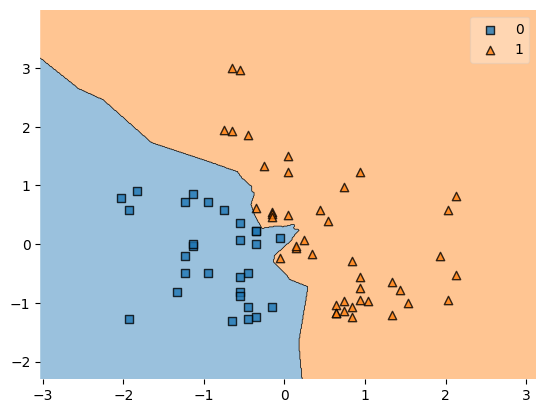

In [68]:
plot_decision_regions(x.to_numpy() , y.to_numpy(),clf=kn)
plt.show()